In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as sm

In [2]:
#wczytuję dane
data = pd.read_csv("Projekt zaliczeniowy1/ames2000_NAfix.csv")
data

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,9,2006,New,Partial,342643
5,20,RL,50,4280,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2009,WD,Normal,88750
6,20,RL,155,20064,Pave,None,IR1,Low,AllPub,Inside,...,0,None,None,None,0,5,2007,WD,Normal,279000
7,20,RM,60,7200,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2006,COD,Normal,105000
8,20,RL,70,9100,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2006,WD,Normal,235000
9,70,C (all),None,6449,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,3,2010,WD,Abnorml,93369


In [3]:
data.columns

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street',
       'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built',
       'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st',
       'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual',
       'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu',
       'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Ga

In [4]:
#dzielę zbiór danych na zbiór treningowy oraz testowy
train, test = train_test_split(data,test_size=0.2)

In [5]:
train.shape,test.shape

((1600, 80), (400, 80))

In [6]:
#na tym etapie sprawdzam jakiego typu zmienne znajdują się obecnie w danych:
#widać, że w danych są braki, które trzeba uzupełnić
#widać również, że w danych występują dane tekstowe (object), które będę musiała zmienić na dane liczbowe (int, float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 57 to 1008
Data columns (total 80 columns):
MS.SubClass        1600 non-null int64
MS.Zoning          1600 non-null object
Lot.Frontage       1600 non-null object
Lot.Area           1600 non-null int64
Street             1600 non-null object
Alley              1600 non-null object
Lot.Shape          1600 non-null object
Land.Contour       1600 non-null object
Utilities          1600 non-null object
Lot.Config         1600 non-null object
Land.Slope         1600 non-null object
Neighborhood       1600 non-null object
Condition.1        1600 non-null object
Condition.2        1600 non-null object
Bldg.Type          1600 non-null object
House.Style        1600 non-null object
Overall.Qual       1600 non-null int64
Overall.Cond       1600 non-null int64
Year.Built         1600 non-null int64
Year.Remod.Add     1600 non-null int64
Roof.Style         1600 non-null object
Roof.Matl          1600 non-null object
Exterior.1st      

Aby móc modelować dane, wszystkie kolumny muszą być reprezentowane jako kolumny numeryczne (typu int lub float). Wypiszę teraz liczności kolumn ze względu na typ danych jaki przechowują.

In [7]:
print(train.dtypes.value_counts())

object    54
int64     26
dtype: int64


Mamy 54 kolumny zawierające tekst, które muszę przekształcić do postaci numerycznej. Wybiorę kolumny zawierające elementy typu object za pomocą funkcji select_dtype, a następnie wyświetlę wiersz próbki, aby lepiej zrozumieć, jak sformatowane są wartości w każdej kolumnie.

In [8]:
object_columns_train = train.select_dtypes(include=['object'])
print(object_columns_train.iloc[0])

MS.Zoning              RL
Lot.Frontage           79
Street               Pave
Alley                None
Lot.Shape             IR1
Land.Contour          Lvl
Utilities          AllPub
Lot.Config         Inside
Land.Slope            Gtl
Neighborhood      NoRidge
Condition.1          Norm
Condition.2          Norm
Bldg.Type            1Fam
House.Style        2Story
Roof.Style          Gable
Roof.Matl         CompShg
Exterior.1st      VinylSd
Exterior.2nd      VinylSd
Mas.Vnr.Type      BrkFace
Mas.Vnr.Area          921
Exter.Qual             Gd
Exter.Cond             TA
Foundation          PConc
Bsmt.Qual              Gd
Bsmt.Cond              TA
Bsmt.Exposure          No
BsmtFin.Type.1        Unf
BsmtFin.SF.1            0
BsmtFin.Type.2        Unf
BsmtFin.SF.2            0
Bsmt.Unf.SF          1264
Total.Bsmt.SF        1264
Heating              GasA
Heating.QC             Ex
Central.Air             Y
Electrical          SBrkr
Bsmt.Full.Bath          0
Bsmt.Half.Bath          0
Kitchen.Qual

In [9]:
# Widzę, że w danych jest None, więc zamienię None na NaN, żeby Python nie wymuszał typu object.
train = train.replace('None', np.nan)

In [10]:
#to samo robię na zbiorze testowym
test = test.replace('None', np.nan)

In [11]:
train.shape,test.shape

((1600, 80), (400, 80))

In [12]:
%matplotlib inline

In [13]:
#sprawdzę jak wygląda korelacja zmiennych liczbowych z ceną sprzedaży nieruchomości
#jest tylko kila zmiennych, które są znacząco skorelowane
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

SalePrice          1.000000
Overall.Qual       0.805696
Gr.Liv.Area        0.717129
X1st.Flr.SF        0.606809
Year.Built         0.575573
Full.Bath          0.549986
Year.Remod.Add     0.536206
TotRms.AbvGrd      0.498312
Fireplaces         0.485618
Wood.Deck.SF       0.336871
Open.Porch.SF      0.300584
X2nd.Flr.SF        0.300343
Half.Bath          0.292305
Lot.Area           0.266511
Bedroom.AbvGr      0.140300
Screen.Porch       0.107551
X3Ssn.Porch        0.037038
Mo.Sold            0.034184
Pool.Area          0.028491
Misc.Val          -0.011887
Yr.Sold           -0.032965
Low.Qual.Fin.SF   -0.056401
MS.SubClass       -0.067267
Overall.Cond      -0.110783
Enclosed.Porch    -0.113383
Kitchen.AbvGr     -0.127459
Name: SalePrice, dtype: float64

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


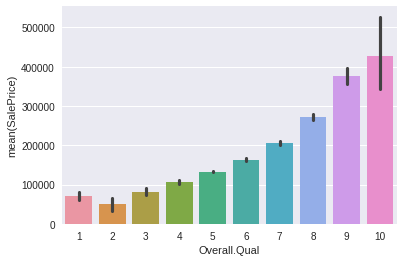

In [14]:
#poniżej przedstawię korelację zmiennej najabrdziej skorelowanej z ceną sprzedaży nieruchomości
sns.barplot(train['Overall.Qual'], train.SalePrice)

In [15]:
#bazując na opisie danych, przeformatuję zmienne tekstowe na dane liczbowe, żeby móc je wykorzystać przy regresji liniowej
#poniższym zmiennym tekstowym przypisuję ocenę punktową zgodnie z opisem danych. Przyjęłam założenie, że im wyższa
#cyfra tym lepsza ocena 
mapping_dict = {'Garage.Cond':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Garage.Qual':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Heating.QC':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Kitchen.Qual':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Exter.Qual':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Exter.Cond':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Fireplace.Qu':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Bsmt.Qual':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Bsmt.Cond':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Pool.QC':{"Ex": 4,"Gd": 3,"TA": 1,"Fa": 1,"NA": 0,}}

train = train.replace(mapping_dict)
train[['Garage.Cond','Garage.Qual','Heating.QC','Kitchen.Qual','Exter.Qual','Exter.Cond','Fireplace.Qu','Bsmt.Qual','Bsmt.Cond','Pool.QC']].head()


,Garage.Cond,Garage.Qual,Heating.QC,Kitchen.Qual,Exter.Qual,Exter.Cond,Fireplace.Qu,Bsmt.Qual,Bsmt.Cond,Pool.QC
57,3,3,5,4,4,3,3,4,3,NaN
690,3,3,3,5,3,3,NaN,4,3,NaN
719,3,2,5,2,3,4,NaN,2,2,NaN
695,3,3,5,4,4,3,NaN,4,3,NaN
1828,3,3,5,3,3,3,NaN,3,3,NaN


In [16]:
#to samo dla testowego
mapping_dict = {'Garage.Cond':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Garage.Qual':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Heating.QC':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Kitchen.Qual':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Exter.Qual':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Exter.Cond':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Fireplace.Qu':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Bsmt.Qual':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Bsmt.Cond':{"Ex": 5,"Gd": 4,"TA": 3,"Fa": 2,"Po": 1,"NA": 0},
                'Pool.QC':{"Ex": 4,"Gd": 3,"TA": 1,"Fa": 1,"NA": 0,}}

test = test.replace(mapping_dict)
test[['Garage.Cond','Garage.Qual','Heating.QC','Kitchen.Qual','Exter.Qual','Exter.Cond','Fireplace.Qu','Bsmt.Qual','Bsmt.Cond','Pool.QC']].head()


,Garage.Cond,Garage.Qual,Heating.QC,Kitchen.Qual,Exter.Qual,Exter.Cond,Fireplace.Qu,Bsmt.Qual,Bsmt.Cond,Pool.QC
316,3,3,5,4,4,3,5,4,3,NaN
648,3,3,5,5,5,3,5,5,3,NaN
1623,3,3,3,3,3,3,NaN,3,3,NaN
1085,3,3,4,3,3,3,NaN,3,3,NaN
550,3,3,5,3,3,3,4,3,3,NaN


In [17]:
print(train.dtypes.value_counts())

object    54
int64     26
dtype: int64


In [18]:
train.shape,test.shape

((1600, 80), (400, 80))

In [19]:
#zmieniam kolejne zmienenne tekstowe
mapping_dict1 = {'Garage.Finish':{"Fin": 3,"RFn": 2,"Unf": 1,"NA": 0},
                'BsmtFin.Type.1':{"GLQ": 6,"ALQ": 5,"BLQ": 4,"Rec": 3,"LwQ": 2,"Unf": 1,"NA": 0},
                'BsmtFin.Type.2':{"GLQ": 6,"ALQ": 5,"BLQ": 4,"Rec": 3,"LwQ": 2,"Unf": 1,"NA": 0},
                'Bsmt.Exposure':{"Gd": 3,"Av": 2,"Mn": 1,"No": 0,"NA": 0},
                'Utilities':{"AllPub": 4,"NoSewr": 3,"NoSeWa": 2,"ELO": 1},
                'Land.Slope':{"Gtl": 3,"Mod": 2,"Sev": 1,},
                'Functional':{"Typ": 8,"Min1": 7,"Min2": 6,"Mod": 5,"Maj1": 4,"Maj2": 3,"Sev": 2,"Sal": 1},
                'Paved.Drive':{"Y": 3,"P": 2,"N": 1},
                'Fence':{"GdPrv": 4,"MnPrv": 3,"GdWo": 2,"MnWw": 1,"NA": 0}}
train = train.replace(mapping_dict1)
train[['Garage.Finish','BsmtFin.Type.1','BsmtFin.Type.2','Bsmt.Exposure','Utilities','Land.Slope','Functional','Paved.Drive','Fence']].head()


,Garage.Finish,BsmtFin.Type.1,BsmtFin.Type.2,Bsmt.Exposure,Utilities,Land.Slope,Functional,Paved.Drive,Fence
57,2,1,1,0,4,3,8,3,NaN
690,2,5,2,2,4,3,8,3,NaN
719,1,1,1,0,4,3,8,3,NaN
695,2,6,1,2,4,3,8,3,NaN
1828,2,5,1,0,4,3,8,3,3


In [20]:
#to samo dla zbioru testowego
mapping_dict1 = {'Garage.Finish':{"Fin": 3,"RFn": 2,"Unf": 1,"NA": 0},
                'BsmtFin.Type.1':{"GLQ": 6,"ALQ": 5,"BLQ": 4,"Rec": 3,"LwQ": 2,"Unf": 1,"NA": 0},
                'BsmtFin.Type.2':{"GLQ": 6,"ALQ": 5,"BLQ": 4,"Rec": 3,"LwQ": 2,"Unf": 1,"NA": 0},
                'Bsmt.Exposure':{"Gd": 3,"Av": 2,"Mn": 1,"No": 0,"NA": 0},
                'Utilities':{"AllPub": 4,"NoSewr": 3,"NoSeWa": 2,"ELO": 1},
                'Land.Slope':{"Gtl": 3,"Mod": 2,"Sev": 1,},
                'Functional':{"Typ": 8,"Min1": 7,"Min2": 6,"Mod": 5,"Maj1": 4,"Maj2": 3,"Sev": 2,"Sal": 1},
                'Paved.Drive':{"Y": 3,"P": 2,"N": 1},
                'Fence':{"GdPrv": 4,"MnPrv": 3,"GdWo": 2,"MnWw": 1,"NA": 0}}
test = test.replace(mapping_dict1)
test[['Garage.Finish','BsmtFin.Type.1','BsmtFin.Type.2','Bsmt.Exposure','Utilities','Land.Slope','Functional','Paved.Drive','Fence']].head()


,Garage.Finish,BsmtFin.Type.1,BsmtFin.Type.2,Bsmt.Exposure,Utilities,Land.Slope,Functional,Paved.Drive,Fence
316,3,6,1,3,4,3,8,3,NaN
648,3,6,1,3,4,3,8,3,NaN
1623,1,1,1,2,4,3,8,2,NaN
1085,1,6,1,0,4,3,8,3,NaN
550,1,5,1,1,4,3,8,3,2


In [21]:
#sprawdzam jak wygląda w zbiorze informacja dotycząca klimatyzacji. 
train["Central.Air"].value_counts()

Y    1496
N     104
Name: Central.Air, dtype: int64

In [22]:
#postanowiłam zamienić informację tekstową na cyfry
mapping_dict2 = {"Central.Air" :{"Y":1,"N": 0}}

train = train.replace(mapping_dict2)
train[["Central.Air"]].head()

,Central.Air
57,1
690,1
719,1
695,1
1828,1


In [23]:
#czas na testowy
mapping_dict2 = {"Central.Air" :{"Y":1,"N": 0}}

test = test.replace(mapping_dict2)
test[["Central.Air"]].head()

,Central.Air
316,1
648,1
1623,1
1085,0
550,1


In [24]:
#w zbiorze danych zauważyłam, że również zmienną street mogę przeformatować w taki sam sposób co zmienną dotyczącą klimy
mapping_dict3 = {'Street':{"Pave": 1,"Grvl": 0}}

train = train.replace(mapping_dict3)
train[['Street']].head()

,Street
57,1
690,1
719,1
695,1
1828,1


In [25]:
#i testowy
mapping_dict3 = {'Street':{"Pave": 1,"Grvl": 0}}

test = test.replace(mapping_dict3)
test[['Street']].head()

,Street
316,1
648,1
1623,1
1085,1
550,1


In [26]:
#ponownie sprawdzam, które zmienne są są rozpoznawane przez python jako dane tekstowe - typu object 
object_columns_train = train.select_dtypes(include=['object'])
print(object_columns_train.iloc[0])

MS.Zoning              RL
Lot.Frontage           79
Alley                 NaN
Lot.Shape             IR1
Land.Contour          Lvl
Utilities               4
Lot.Config         Inside
Neighborhood      NoRidge
Condition.1          Norm
Condition.2          Norm
Bldg.Type            1Fam
House.Style        2Story
Roof.Style          Gable
Roof.Matl         CompShg
Exterior.1st      VinylSd
Exterior.2nd      VinylSd
Mas.Vnr.Type      BrkFace
Mas.Vnr.Area          921
Exter.Qual              4
Exter.Cond              3
Foundation          PConc
Bsmt.Qual               4
Bsmt.Cond               3
Bsmt.Exposure           0
BsmtFin.Type.1          1
BsmtFin.SF.1            0
BsmtFin.Type.2          1
BsmtFin.SF.2            0
Bsmt.Unf.SF          1264
Total.Bsmt.SF        1264
Heating              GasA
Heating.QC              5
Electrical          SBrkr
Bsmt.Full.Bath          0
Bsmt.Half.Bath          0
Kitchen.Qual            4
Functional              8
Fireplace.Qu            3
Garage.Type 

In [27]:
train["Alley"].value_counts()

Grvl    63
Pave    41
Name: Alley, dtype: int64

In [28]:
#przy tej zmiennej również stosuję formatowanie, które zrobiłam powyżej
mapping_dict4 = {'Alley':{"Pave": 1,"Grvl": 0}}

train = train.replace(mapping_dict4)
train[['Alley']].head()

,Alley
57,NaN
690,NaN
719,NaN
695,NaN
1828,NaN


In [29]:
mapping_dict4 = {'Alley':{"Pave": 1,"Grvl": 0}}

test = test.replace(mapping_dict4)
test[['Alley']].head()

,Alley
316,NaN
648,NaN
1623,NaN
1085,0.0
550,NaN


In [30]:
#28 zmiennych, które są już zmiennymi liczbowymi, które nadal są rozpoznawane przyez python jako zmienna tekstowa, 
#zamieniam na tym float (zmienną liczbową)
train['Garage.Cond'] = train['Garage.Cond'].astype('float')
train['Garage.Qual'] = train['Garage.Qual'].astype('float')
train['Garage.Cars'] = train['Garage.Cars'].astype('float')
train['Garage.Area'] = train['Garage.Area'].astype('float')
train['Garage.Finish'] = train['Garage.Finish'].astype('float')
train['Lot.Frontage'] = train['Lot.Frontage'].astype('float')
train['Garage.Yr.Blt'] = train['Garage.Yr.Blt'].astype('float')
train['Utilities'] = train['Utilities'].astype('float')
train['Mas.Vnr.Area'] = train['Mas.Vnr.Area'].astype('float')
train['Exter.Qual'] = train['Exter.Qual'].astype('float')
train['Exter.Cond'] = train['Exter.Cond'].astype('float')
train['Bsmt.Exposure'] = train['Bsmt.Exposure'].astype('float')
train['BsmtFin.Type.1'] = train['BsmtFin.Type.1'].astype('float')
train['BsmtFin.SF.1'] = train['BsmtFin.SF.1'].astype('float')
train['BsmtFin.Type.2'] = train['BsmtFin.Type.2'].astype('float')
train['BsmtFin.SF.2'] = train['BsmtFin.SF.2'].astype('float')
train['Bsmt.Unf.SF'] = train['Bsmt.Unf.SF'].astype('float')
train['Total.Bsmt.SF'] = train['Total.Bsmt.SF'].astype('float')
train['Heating.QC'] = train['Heating.QC'].astype('float')
train['Bsmt.Full.Bath'] = train['Bsmt.Full.Bath'].astype('float')
train['Bsmt.Half.Bath'] = train['Bsmt.Half.Bath'].astype('float')
train['Kitchen.Qual'] = train['Kitchen.Qual'].astype('float')
train['Functional'] = train['Functional'].astype('float')
train['Bsmt.Qual'] = train['Bsmt.Qual'].astype('float')
train['Bsmt.Cond'] = train['Bsmt.Cond'].astype('float')
train['Fireplace.Qu'] = train['Fireplace.Qu'].astype('float')
train['Pool.QC'] = train['Pool.QC'].astype('float')
train['Fence'] = train['Fence'].astype('float')

In [31]:
#sprawdzam, które zmienne nadal są zmiennymi tekstowymi
object_columns_train = train.select_dtypes(include=['object'])
print(object_columns_train.iloc[0])

MS.Zoning              RL
Lot.Shape             IR1
Land.Contour          Lvl
Lot.Config         Inside
Neighborhood      NoRidge
Condition.1          Norm
Condition.2          Norm
Bldg.Type            1Fam
House.Style        2Story
Roof.Style          Gable
Roof.Matl         CompShg
Exterior.1st      VinylSd
Exterior.2nd      VinylSd
Mas.Vnr.Type      BrkFace
Foundation          PConc
Heating              GasA
Electrical          SBrkr
Garage.Type        Attchd
Misc.Feature          NaN
Sale.Type             WD 
Sale.Condition     Normal
Name: 57, dtype: object


In [32]:
#to samo przekształcenie na zbiorze testowym
test['Garage.Cond'] = test['Garage.Cond'].astype('float')
test['Garage.Qual'] = test['Garage.Qual'].astype('float')
test['Garage.Cars'] = test['Garage.Cars'].astype('float')
test['Garage.Area'] = test['Garage.Area'].astype('float')
test['Garage.Finish'] = test['Garage.Finish'].astype('float')
test['Lot.Frontage'] = test['Lot.Frontage'].astype('float')
test['Garage.Yr.Blt'] = test['Garage.Yr.Blt'].astype('float')
test['Utilities'] = test['Utilities'].astype('float')
test['Mas.Vnr.Area'] = test['Mas.Vnr.Area'].astype('float')
test['Exter.Qual'] = test['Exter.Qual'].astype('float')
test['Exter.Cond'] = test['Exter.Cond'].astype('float')
test['Bsmt.Exposure'] = test['Bsmt.Exposure'].astype('float')
test['BsmtFin.Type.1'] = test['BsmtFin.Type.1'].astype('float')
test['BsmtFin.SF.1'] = test['BsmtFin.SF.1'].astype('float')
test['BsmtFin.Type.2'] = test['BsmtFin.Type.2'].astype('float')
test['BsmtFin.SF.2'] = test['BsmtFin.SF.2'].astype('float')
test['Bsmt.Unf.SF'] = test['Bsmt.Unf.SF'].astype('float')
test['Total.Bsmt.SF'] = test['Total.Bsmt.SF'].astype('float')
test['Heating.QC'] = test['Heating.QC'].astype('float')
test['Bsmt.Full.Bath'] = test['Bsmt.Full.Bath'].astype('float')
test['Bsmt.Half.Bath'] = test['Bsmt.Half.Bath'].astype('float')
test['Kitchen.Qual'] = test['Kitchen.Qual'].astype('float')
test['Functional'] = test['Functional'].astype('float')
test['Bsmt.Qual'] = test['Bsmt.Qual'].astype('float')
test['Bsmt.Cond'] = test['Bsmt.Cond'].astype('float')
test['Fireplace.Qu'] = test['Fireplace.Qu'].astype('float')
test['Pool.QC'] = test['Pool.QC'].astype('float')
test['Fence'] = test['Fence'].astype('float')

In [33]:
train.shape,test.shape

((1600, 80), (400, 80))

In [34]:
print(train.dtypes.value_counts())

int64      30
float64    29
object     21
dtype: int64


Następnym etapem jest etam identyfikacji ilości braków oraz decyzja o ich uzupełnieniu

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 57 to 1008
Data columns (total 80 columns):
MS.SubClass        1600 non-null int64
MS.Zoning          1600 non-null object
Lot.Frontage       1336 non-null float64
Lot.Area           1600 non-null int64
Street             1600 non-null int64
Alley              104 non-null float64
Lot.Shape          1600 non-null object
Land.Contour       1600 non-null object
Utilities          1600 non-null float64
Lot.Config         1600 non-null object
Land.Slope         1600 non-null int64
Neighborhood       1600 non-null object
Condition.1        1600 non-null object
Condition.2        1600 non-null object
Bldg.Type          1600 non-null object
House.Style        1600 non-null object
Overall.Qual       1600 non-null int64
Overall.Cond       1600 non-null int64
Year.Built         1600 non-null int64
Year.Remod.Add     1600 non-null int64
Roof.Style         1600 non-null object
Roof.Matl          1600 non-null object
Exterior.1st      

In [36]:
#sprawdzam poniższą zmienną pod kątem braków
train['Lot.Frontage'].value_counts(dropna=False)

NaN      264
60.0     146
80.0      77
70.0      72
50.0      70
75.0      65
65.0      54
85.0      40
64.0      29
63.0      27
68.0      26
78.0      26
24.0      26
90.0      24
74.0      24
21.0      22
72.0      19
76.0      18
82.0      17
59.0      16
51.0      16
88.0      16
57.0      16
52.0      16
66.0      15
73.0      15
35.0      14
62.0      13
67.0      13
81.0      12
        ... 
106.0      2
121.0      2
118.0      2
125.0      2
124.0      2
104.0      2
195.0      1
25.0       1
149.0      1
135.0      1
115.0      1
101.0      1
117.0      1
174.0      1
182.0      1
111.0      1
113.0      1
133.0      1
141.0      1
136.0      1
155.0      1
126.0      1
22.0       1
160.0      1
116.0      1
168.0      1
140.0      1
26.0       1
153.0      1
28.0       1
Name: Lot.Frontage, Length: 118, dtype: int64

In [37]:
#sprawdzam jaki procent w tej zmiennej to braki
total_rows = train.shape[0]
miss1 = train['Lot.Frontage'].isnull().sum()
procent_braków = (miss1 / total_rows)*100
procent_braków

16.5

In [38]:
#zdecydowałam się zastąpić braki "0", tak żeby model traktował 
train['Lot.Frontage'] = train['Lot.Frontage'].replace(np.NaN, 0)

In [39]:
#stosuję taką zmianę na zbiorze testowym
test['Lot.Frontage'] = test['Lot.Frontage'].replace(np.NaN, 0)

Postanowiłam przyjąć zasadę, że zmienne ze znaczącą ilością braków (powyżej 30%) wyrzucam ze zbioru, ponieważ nie wniosą dużo do modelu. Zmienne ze znaczącą ilością braków nie wniosą dużej wartości do procesu uczenia się modelu.

In [40]:
#sprawdzam info o zmiennej, w tym info o brakach
train['Alley'].value_counts(dropna=False)

NaN    1496
0.0      63
1.0      41
Name: Alley, dtype: int64

In [41]:
#sprawdzam ile procent jest braków
total_rows = train.shape[0]
miss2 = train['Alley'].isnull().sum()
procent_braków1 = (miss2 / total_rows)*100
procent_braków1

93.5

In [42]:
#ze względu na to, że prawie 94% to braki, to postanowiłam usunąć tę kolumnę z danych, zgodnie z przyjętym założeniem
train = train.drop('Alley', 1)

In [43]:
#również wyrzucam ze zbioru testowego
test = test.drop('Alley', 1)

In [44]:
#sprawdzam, które zmienne mają duże braki
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 57 to 1008
Data columns (total 79 columns):
MS.SubClass        1600 non-null int64
MS.Zoning          1600 non-null object
Lot.Frontage       1600 non-null float64
Lot.Area           1600 non-null int64
Street             1600 non-null int64
Lot.Shape          1600 non-null object
Land.Contour       1600 non-null object
Utilities          1600 non-null float64
Lot.Config         1600 non-null object
Land.Slope         1600 non-null int64
Neighborhood       1600 non-null object
Condition.1        1600 non-null object
Condition.2        1600 non-null object
Bldg.Type          1600 non-null object
House.Style        1600 non-null object
Overall.Qual       1600 non-null int64
Overall.Cond       1600 non-null int64
Year.Built         1600 non-null int64
Year.Remod.Add     1600 non-null int64
Roof.Style         1600 non-null object
Roof.Matl          1600 non-null object
Exterior.1st       1600 non-null object
Exterior.2nd      

In [45]:
train.shape,test.shape

((1600, 79), (400, 79))

In [46]:
#sprawdzam kolejną zmienną
train['Misc.Feature'].value_counts(dropna=False)

NaN     1540
Shed      56
Gar2       2
TenC       1
Othr       1
Name: Misc.Feature, dtype: int64

In [47]:
#sprawdzam ile procent jest braków
total_rows = train.shape[0]
miss4 = train['Misc.Feature'].isnull().sum()
procent_braków3 = (miss4 / total_rows)*100
procent_braków3

96.25

In [48]:
#ze względu na to, że prawie 97% to braki, to postanowiłam usunąć tę kolumnę, zgodnie z ww. założeniem
train = train.drop('Misc.Feature', 1)

In [49]:
test = test.drop('Misc.Feature', 1)

In [50]:
train['Misc.Val'].value_counts(dropna=False)

0        1542
400        10
500         8
600         5
2000        4
450         3
2500        2
1500        2
700         2
650         2
4500        2
1200        2
54          1
80          1
350         1
6500        1
420         1
1400        1
460         1
480         1
1512        1
560         1
800         1
900         1
1000        1
1150        1
15500       1
490         1
Name: Misc.Val, dtype: int64

In [51]:
#jeśli wyrzuciłam ze zbioru zmienną, która określa przedmioty stanowiące wyposażenie domu ze względu na dużą ilość braków
#to zdecydowałam się wyrzucić również zmienną określającą wartość tych przedmiotów
train = train.drop('Misc.Val', 1)

In [52]:
test = test.drop('Misc.Val', 1)

In [53]:
#sprawdzam ile procent jest braków
total_rows = train.shape[0]
miss5 = train['Pool.QC'].isnull().sum()
procent_braków4 = (miss5 / total_rows)*100
procent_braków4

99.5

In [54]:
#ze względu na to, że prawie 100% to braki, to postanowiłam usunąć tę kolumnę 
train = train.drop('Pool.QC', 1)

In [55]:
test = test.drop('Pool.QC', 1)

In [56]:
train['Pool.Area'].value_counts(dropna=False)

0      1592
800       1
648       1
576       1
519       1
480       1
444       1
368       1
228       1
Name: Pool.Area, dtype: int64

In [57]:
#jeśli wyrzuciłam ze zbioru zmienną, która określa jakość basenu ze względu na dużą ilość braków, a analiza zmiennej
#określającej wielkość basenu pokazuje, że jest tylko kilka nieruchomości z basenem, dlatego również postanowiłam ją 
#wyrzucić ze zbioru
train = train.drop('Pool.Area', 1)

In [58]:
test = test.drop('Pool.Area', 1)

In [59]:
#sprawdzam ile procent jest braków
total_rows = train.shape[0]
miss6 = train['Fence'].isnull().sum()
procent_braków5 = (miss6 / total_rows)*100
procent_braków5

80.25

In [60]:
#ze względu na to, że 80% to braki, to postanowiłam usunąć tę kolumnę 
train = train.drop('Fence', 1)

In [61]:
test = test.drop('Fence', 1)

In [62]:
train['Mas.Vnr.Type'].value_counts(dropna=False)

NaN        987
BrkFace    481
Stone      122
BrkCmn      10
Name: Mas.Vnr.Type, dtype: int64

In [63]:
#sprawdzam ile procent jest braków
total_rows = train.shape[0]
miss7 = train['Mas.Vnr.Type'].isnull().sum()
procent_braków6 = (miss7 / total_rows)*100
procent_braków6

61.68749999999999

In [64]:
#ze względu na to, że prawie 62% to braki, to postanowiłam usunąć tę kolumnę 
train = train.drop('Mas.Vnr.Type', 1)

In [65]:
test = test.drop('Mas.Vnr.Type', 1)

In [66]:
#sprawdzam ile procent jest braków
total_rows = train.shape[0]
miss8 = train['Fireplace.Qu'].isnull().sum()
procent_braków7 = (miss8 / total_rows)*100
procent_braków7

49.5

In [67]:
#ze względu na to, że prawie 50% to braki, to postanowiłam usunąć tę kolumnę 
train = train.drop('Fireplace.Qu', 1)

In [68]:
test = test.drop('Fireplace.Qu', 1)

In [69]:
total_rows = train.shape[0]
miss9 = train['Lot.Area'].isnull().sum()
procent_braków8 = (miss9 / total_rows)*100
procent_braków8

0.0

In [70]:
train['SalePrice'].value_counts(dropna=False)

135000    20
140000    20
160000    17
130000    15
110000    15
128000    13
127000    12
155000    12
125000    12
185000    12
150000    12
145000    12
148000    11
147000    11
139000    11
200000    10
170000    10
115000    10
215000    10
220000     9
173000     9
180000     9
105000     9
123000     9
100000     9
120000     9
129000     9
144000     9
190000     9
175000     9
          ..
257076     1
206300     1
83000      1
113722     1
152400     1
189500     1
296000     1
349265     1
99800      1
230500     1
337000     1
118964     1
217500     1
246900     1
251000     1
149300     1
205950     1
208000     1
221370     1
111750     1
212109     1
122000     1
132250     1
138400     1
249000     1
206000     1
183900     1
93369      1
419005     1
50138      1
Name: SalePrice, Length: 702, dtype: int64

In [71]:
train.shape,test.shape

((1600, 72), (400, 72))

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 57 to 1008
Data columns (total 72 columns):
MS.SubClass        1600 non-null int64
MS.Zoning          1600 non-null object
Lot.Frontage       1600 non-null float64
Lot.Area           1600 non-null int64
Street             1600 non-null int64
Lot.Shape          1600 non-null object
Land.Contour       1600 non-null object
Utilities          1600 non-null float64
Lot.Config         1600 non-null object
Land.Slope         1600 non-null int64
Neighborhood       1600 non-null object
Condition.1        1600 non-null object
Condition.2        1600 non-null object
Bldg.Type          1600 non-null object
House.Style        1600 non-null object
Overall.Qual       1600 non-null int64
Overall.Cond       1600 non-null int64
Year.Built         1600 non-null int64
Year.Remod.Add     1600 non-null int64
Roof.Style         1600 non-null object
Roof.Matl          1600 non-null object
Exterior.1st       1600 non-null object
Exterior.2nd      

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 316 to 790
Data columns (total 72 columns):
MS.SubClass        400 non-null int64
MS.Zoning          400 non-null object
Lot.Frontage       400 non-null float64
Lot.Area           400 non-null int64
Street             400 non-null int64
Lot.Shape          400 non-null object
Land.Contour       400 non-null object
Utilities          400 non-null float64
Lot.Config         400 non-null object
Land.Slope         400 non-null int64
Neighborhood       400 non-null object
Condition.1        400 non-null object
Condition.2        400 non-null object
Bldg.Type          400 non-null object
House.Style        400 non-null object
Overall.Qual       400 non-null int64
Overall.Cond       400 non-null int64
Year.Built         400 non-null int64
Year.Remod.Add     400 non-null int64
Roof.Style         400 non-null object
Roof.Matl          400 non-null object
Exterior.1st       400 non-null object
Exterior.2nd       400 non-null object
Ma

Po zidentyfikowaniu zmiennych z brakami oraz analizie opisu poniższych zmiennych, postanowiłam zastosować dwie opcje:
#mediana - ponieważ jest mniej wrażliwa na znaczące odchylenia w zmiennych
Mas.Vnr.Area       1586 non-null float64,
Bsmt.Qual          1557 non-null float64,
Bsmt.Exposure      1555 non-null float64,
BsmtFin.Type.1     1557 non-null float64,
BsmtFin.Type.2     1556 non-null float64,
BsmtFin.SF.1       1599 non-null float64,
BsmtFin.SF.2       1599 non-null float64,
Bsmt.Unf.SF        1599 non-null float64,
Bsmt.Cond          1557 non-null float64,
Garage.Yr.Blt      1505 non-null float64,
Garage.Qual        1505 non-null float64,
Garage.Cond        1505 non-null float64,

#uzupełnienie braków 0:
Bsmt.Full.Bath     1599 non-null float64,
Bsmt.Half.Bath     1599 non-null float64,
Total.Bsmt.SF      1599 non-null float64,
Garage.Type        1506 non-null object,
Garage.Finish      1505 non-null float64



In [74]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer

In [75]:
#chciałbym wykorzystać metodę Imputer..w uproszczony sposób
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [76]:
#uzupełniam braki medianą, to samo robię w zbiorze testowym, przy czym w zbiorze testowym wykorzystuję medianę wyliczoną
#na zbiorze treningowym tych zmiennych
train[['Mas.Vnr.Area']] = imputer.fit_transform(train[['Mas.Vnr.Area']])
test[['Mas.Vnr.Area']] = imputer.transform(test[['Mas.Vnr.Area']])

train[['Bsmt.Qual']] = imputer.fit_transform(train[['Bsmt.Qual']])
test[['Bsmt.Qual']] = imputer.transform(test[['Bsmt.Qual']])

train[['Bsmt.Exposure']] = imputer.fit_transform(train[['Bsmt.Exposure']])
test[['Bsmt.Exposure']] = imputer.transform(test[['Bsmt.Exposure']])

train[['BsmtFin.Type.1']] = imputer.fit_transform(train[['BsmtFin.Type.1']])
test[['BsmtFin.Type.1']] = imputer.transform(test[['BsmtFin.Type.1']])

train[['BsmtFin.Type.2']] = imputer.fit_transform(train[['BsmtFin.Type.2']])
test[['BsmtFin.Type.2']] = imputer.transform(test[['BsmtFin.Type.2']])

train[['BsmtFin.SF.1']] = imputer.fit_transform(train[['BsmtFin.SF.1']])
test[['BsmtFin.SF.1']] = imputer.transform(test[['BsmtFin.SF.1']])

train[['BsmtFin.SF.2']] = imputer.fit_transform(train[['BsmtFin.SF.2']])
test[['BsmtFin.SF.2']] = imputer.transform(test[['BsmtFin.SF.2']])

train[['Bsmt.Unf.SF']] = imputer.fit_transform(train[['Bsmt.Unf.SF']])
test[['Bsmt.Unf.SF']] = imputer.transform(test[['Bsmt.Unf.SF']])

train[['Bsmt.Cond']] = imputer.fit_transform(train[['Bsmt.Cond']])
test[['Bsmt.Cond']] = imputer.transform(test[['Bsmt.Cond']])

train[['Garage.Yr.Blt']] = imputer.fit_transform(train[['Garage.Yr.Blt']])
test[['Garage.Yr.Blt']] = imputer.transform(test[['Garage.Yr.Blt']])

train[['Garage.Qual']] = imputer.fit_transform(train[['Garage.Qual']])
test[['Garage.Qual']] = imputer.transform(test[['Garage.Qual']])

train[['Garage.Cond']] = imputer.fit_transform(train[['Garage.Cond']])
test[['Garage.Cond']] = imputer.transform(test[['Garage.Cond']])

train[['Garage.Cars']] = imputer.fit_transform(train[['Garage.Cars']])
test[['Garage.Cars']] = imputer.transform(test[['Garage.Cars']])

Po analizie poniższych zmiennych widać, że w danych jest 317 obserwacji z brakami, łącznie z brakiem informacji o cenie sprzedaży. Standardowo bym wyrzuciła te obseracje, natomiast z racji tego, że w poleceniu zadania jest informacja o tym, żeby nie wyrzucać żadnych obserwacji to postanowiłam uzupełnić braki medianą (ponieważ jest mniej wrażliwa na znaczące odchylenia w zmiennych)

In [77]:
#sprawdzam czy się mi udało 
train['Garage.Cond'].value_counts(dropna=False)

3.0    1546
2.0      40
1.0       7
4.0       6
5.0       1
Name: Garage.Cond, dtype: int64

In [78]:
train['Mas.Vnr.Area'].value_counts(dropna=False)

0.0      987
120.0      9
216.0      8
176.0      8
178.0      7
180.0      7
108.0      7
60.0       7
210.0      6
200.0      6
260.0      6
170.0      6
72.0       6
256.0      6
270.0      6
132.0      6
80.0       5
50.0       5
340.0      5
145.0      5
84.0       5
112.0      5
186.0      5
240.0      5
144.0      5
128.0      5
140.0      5
196.0      5
194.0      4
20.0       4
        ... 
254.0      1
89.0       1
235.0      1
97.0       1
187.0      1
234.0      1
262.0      1
239.0      1
442.0      1
169.0      1
153.0      1
245.0      1
109.0      1
355.0      1
146.0      1
495.0      1
734.0      1
388.0      1
161.0      1
428.0      1
276.0      1
870.0      1
426.0      1
921.0      1
975.0      1
766.0      1
530.0      1
886.0      1
650.0      1
772.0      1
Name: Mas.Vnr.Area, Length: 316, dtype: int64

In [79]:
train.shape,test.shape

((1600, 72), (400, 72))

In [80]:
#zgodnie z podjętą decyzją w poniższych zmiennych uzupełniam braki 0
train = train.fillna({
    'Bsmt.Full.Bath': 0,
    'Bsmt.Half.Bath': 0,
    'Total.Bsmt.SF': 0,
    'Garage.Type': 'missing',
    'Garage.Finish': 0,
    'Garage.Area': 0,
    'Fireplaces': 0})

In [81]:
test = test.fillna({
    'Bsmt.Full.Bath': 0,
    'Bsmt.Half.Bath': 0,
    'Total.Bsmt.SF': 0,
    'Garage.Type': 'missing',
    'Garage.Finish': 0,
    'Garage.Area': 0,
    'Fireplaces': 0})

In [82]:
#sprawdzam czy się udało
train['Garage.Area'].value_counts(dropna=False)

0.0      98
576.0    56
440.0    49
240.0    39
484.0    38
528.0    33
400.0    30
480.0    29
308.0    28
288.0    26
264.0    25
336.0    18
420.0    17
280.0    17
462.0    14
672.0    13
286.0    13
384.0    12
504.0    12
660.0    10
300.0    10
216.0    10
525.0    10
550.0     9
572.0     9
564.0     9
506.0     9
352.0     9
520.0     9
588.0     9
         ..
404.0     1
476.0     1
468.0     1
414.0     1
210.0     1
904.0     1
428.0     1
808.0     1
962.0     1
226.0     1
207.0     1
824.0     1
983.0     1
825.0     1
791.0     1
701.0     1
619.0     1
673.0     1
783.0     1
889.0     1
401.0     1
696.0     1
872.0     1
444.0     1
787.0     1
938.0     1
936.0     1
632.0     1
186.0     1
533.0     1
Name: Garage.Area, Length: 489, dtype: int64

In [83]:
train['Fireplaces'].value_counts(dropna=False)

0    792
1    676
2    124
3      7
4      1
Name: Fireplaces, dtype: int64

In [84]:
test['Fireplaces'].value_counts(dropna=False)

0    188
1    181
2     31
Name: Fireplaces, dtype: int64

In [85]:
#widać, że nie ma już braków
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 57 to 1008
Data columns (total 72 columns):
MS.SubClass        1600 non-null int64
MS.Zoning          1600 non-null object
Lot.Frontage       1600 non-null float64
Lot.Area           1600 non-null int64
Street             1600 non-null int64
Lot.Shape          1600 non-null object
Land.Contour       1600 non-null object
Utilities          1600 non-null float64
Lot.Config         1600 non-null object
Land.Slope         1600 non-null int64
Neighborhood       1600 non-null object
Condition.1        1600 non-null object
Condition.2        1600 non-null object
Bldg.Type          1600 non-null object
House.Style        1600 non-null object
Overall.Qual       1600 non-null int64
Overall.Cond       1600 non-null int64
Year.Built         1600 non-null int64
Year.Remod.Add     1600 non-null int64
Roof.Style         1600 non-null object
Roof.Matl          1600 non-null object
Exterior.1st       1600 non-null object
Exterior.2nd      

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 316 to 790
Data columns (total 72 columns):
MS.SubClass        400 non-null int64
MS.Zoning          400 non-null object
Lot.Frontage       400 non-null float64
Lot.Area           400 non-null int64
Street             400 non-null int64
Lot.Shape          400 non-null object
Land.Contour       400 non-null object
Utilities          400 non-null float64
Lot.Config         400 non-null object
Land.Slope         400 non-null int64
Neighborhood       400 non-null object
Condition.1        400 non-null object
Condition.2        400 non-null object
Bldg.Type          400 non-null object
House.Style        400 non-null object
Overall.Qual       400 non-null int64
Overall.Cond       400 non-null int64
Year.Built         400 non-null int64
Year.Remod.Add     400 non-null int64
Roof.Style         400 non-null object
Roof.Matl          400 non-null object
Exterior.1st       400 non-null object
Exterior.2nd       400 non-null object
Ma

In [87]:
train.shape,test.shape

((1600, 72), (400, 72))

Teraz będę zmieniać zmienne tekstowe metodą OneHotEncoder

In [88]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

In [89]:
#dla tych kolumn chę zastosować metodę onehotencoder
categorical_columns = ['MS.Zoning','Lot.Shape', 'Land.Contour', 'Lot.Config','Neighborhood','Condition.1',\
                               'Condition.2','Bldg.Type','House.Style','Roof.Style','Roof.Matl','Exterior.1st',\
                               'Exterior.2nd','Foundation','Heating','Electrical','Sale.Condition',\
                               'Sale.Type', 'Garage.Type']

In [90]:
train['Garage.Type'].unique()

array(['Attchd', 'CarPort', 'Basment', 'Detchd', 'BuiltIn', 'missing',
       '2Types'], dtype=object)

In [91]:
onehot_encoder_full = OneHotEncoder(handle_unknown="ignore",
                                    sparse=False)

In [92]:
train.shape

(1600, 72)

In [93]:
train1 = onehot_encoder_full.fit_transform(train[categorical_columns])
test1 = onehot_encoder_full.transform(test[categorical_columns])

In [94]:
train1.shape, train.shape

((1600, 157), (1600, 72))

In [95]:
#po kilku nieudanych próbach połączenia zbioru train1 i train, doszłam do wniosku, że muszę ponownie stworzyć index
#zarówno dla zbioru train oraz test, ponieważ przy dzieleniu danych na dwa zbiory istniejący index nie został uporządkowany
train=train.reset_index()

In [96]:
df_train1 = pd.DataFrame(train1)

In [97]:
#sprawdzam nowo stworzone kolumny przez metodę onehotencoding
df_train1

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [98]:
#widać dodany nowy index, stary index wyrzucę ze zbioru
train

,index,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,57,60,RL,79.0,10208,1,IR1,Lvl,4.0,Inside,...,220,0,0,0,0,7,2009,WD,Normal,265000
1,690,20,RL,0.0,15611,1,IR1,Lvl,4.0,Corner,...,180,0,0,0,0,3,2008,WD,Abnorml,175000
2,719,50,RL,60.0,7008,1,Reg,Lvl,4.0,Corner,...,0,0,70,0,0,3,2006,WD,Normal,86900
3,695,20,RL,70.0,9135,1,Reg,Lvl,4.0,Inside,...,192,23,0,0,0,5,2006,WD,Normal,200000
4,1828,20,RL,80.0,9600,1,Reg,Lvl,4.0,Corner,...,224,88,0,0,0,7,2009,WD,Normal,124500
5,1793,190,RL,107.0,10615,1,IR1,Bnk,4.0,Corner,...,0,74,0,0,0,8,2009,WD,Abnorml,95000
6,970,20,C (all),66.0,8712,0,Reg,Bnk,4.0,Inside,...,0,0,0,0,0,6,2010,WD,Alloca,55993
7,1778,70,RL,53.0,7155,1,Reg,Lvl,4.0,Inside,...,0,0,116,0,0,7,2007,WD,Normal,135000
8,1948,90,RL,0.0,7032,1,IR1,Lvl,4.0,Corner,...,42,0,0,0,0,12,2006,WD,Normal,135960
9,1811,20,RL,66.0,10235,1,IR1,Lvl,4.0,Inside,...,192,64,0,0,0,9,2007,New,Partial,246500


In [99]:
#łącze dwa zbiory, tj. nowe kolumny z onehote-a i pozostałe kolumny ze zbioru treningowego
train = pd.concat([train, df_train1], axis=1)

In [100]:
train

,index,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,147,148,149,150,151,152,153,154,155,156
0,57,60,RL,79.0,10208,1,IR1,Lvl,4.0,Inside,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,690,20,RL,0.0,15611,1,IR1,Lvl,4.0,Corner,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,719,50,RL,60.0,7008,1,Reg,Lvl,4.0,Corner,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,695,20,RL,70.0,9135,1,Reg,Lvl,4.0,Inside,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1828,20,RL,80.0,9600,1,Reg,Lvl,4.0,Corner,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1793,190,RL,107.0,10615,1,IR1,Bnk,4.0,Corner,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,970,20,C (all),66.0,8712,0,Reg,Bnk,4.0,Inside,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1778,70,RL,53.0,7155,1,Reg,Lvl,4.0,Inside,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1948,90,RL,0.0,7032,1,IR1,Lvl,4.0,Corner,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1811,20,RL,66.0,10235,1,IR1,Lvl,4.0,Inside,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [101]:
train.shape

(1600, 230)

In [102]:
#wyrzucam ze zbioru kolumny, dla których została zastosowana metoda onehot encoding
train = train.drop(categorical_columns, axis=1)

In [103]:
#plus wyrzucam kolumnę index
train = train.drop('index', 1)

In [104]:
train.shape

(1600, 210)

In [105]:
test1.shape, test.shape

((400, 157), (400, 72))

In [106]:
#to samo robię na zbiorze testowym
test=test.reset_index()

In [107]:
test

,index,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,316,60,RL,105.0,13650,1,Reg,Lvl,4.0,Corner,...,238,130,0,0,0,6,2010,WD,Normal,320000
1,648,20,RL,113.0,13438,1,IR1,HLS,4.0,Corner,...,90,154,0,0,0,7,2009,WD,Normal,410000
2,1623,90,RL,100.0,25000,1,Reg,Low,4.0,Inside,...,0,0,0,0,0,6,2007,WD,Normal,143000
3,1085,20,RM,56.0,9836,1,Reg,Bnk,4.0,Inside,...,0,175,0,0,0,12,2008,WD,Abnorml,143000
4,550,60,RL,78.0,11419,1,Reg,Lvl,4.0,Corner,...,0,0,134,0,0,12,2009,WD,Normal,152500
5,1997,60,RL,76.0,10142,1,IR1,Lvl,4.0,Inside,...,0,45,0,0,0,1,2010,WD,Normal,233000
6,939,160,RM,36.0,2592,1,Reg,Lvl,4.0,Inside,...,182,0,0,0,0,4,2010,WD,Normal,85000
7,563,70,RL,80.0,8146,1,Reg,Lvl,4.0,Corner,...,0,0,168,0,111,5,2009,WD,Normal,114000
8,1048,20,RH,60.0,8400,1,Reg,Lvl,4.0,Inside,...,250,0,24,0,0,9,2009,WD,Normal,82000
9,411,60,RL,0.0,11075,1,IR1,Lvl,4.0,Inside,...,305,189,0,0,0,9,2008,WD,Normal,172000


In [108]:
df_test1 = pd.DataFrame(test1)

In [109]:
df_test1

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [110]:
test = pd.concat([test, df_test1], axis=1)

In [111]:
test

,index,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,147,148,149,150,151,152,153,154,155,156
0,316,60,RL,105.0,13650,1,Reg,Lvl,4.0,Corner,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,648,20,RL,113.0,13438,1,IR1,HLS,4.0,Corner,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1623,90,RL,100.0,25000,1,Reg,Low,4.0,Inside,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1085,20,RM,56.0,9836,1,Reg,Bnk,4.0,Inside,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,550,60,RL,78.0,11419,1,Reg,Lvl,4.0,Corner,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1997,60,RL,76.0,10142,1,IR1,Lvl,4.0,Inside,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,939,160,RM,36.0,2592,1,Reg,Lvl,4.0,Inside,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,563,70,RL,80.0,8146,1,Reg,Lvl,4.0,Corner,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1048,20,RH,60.0,8400,1,Reg,Lvl,4.0,Inside,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,411,60,RL,0.0,11075,1,IR1,Lvl,4.0,Inside,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [112]:
test.shape

(400, 230)

In [113]:
test = test.drop(categorical_columns, axis=1)

In [114]:
test = test.drop('index', 1)

In [115]:
test.shape

(400, 210)

In [116]:
#sprawdzam czy moje oba zbiory mają tą samą ilość kolumn
train.shape,test.shape

((1600, 210), (400, 210))

In [117]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

In [118]:
#dzielę moje zbiory na X i Y, żeby model mógł się nauczyć przewidywać cenę nieruchomości na danych ze zbioru treningowego
y_train = train.SalePrice
X_train = train.drop("SalePrice", axis=1)
y_test = test.SalePrice
X_test = test.drop("SalePrice", axis=1)

In [119]:
#chcę zastosować taką samą metodę uczenia modelu dla moich trzech typów regresji
#kfold jest to metoda gdzie próba jest dzielona na k podzbiorów, Następnie kolejno każdy z nich bierze się jako zbiór testowy, 
#a pozostałe razem jako zbiór uczący i wykonuje analizę. 
#Analiza jest więc wykonywana K razy. K rezultatów jest następnie uśrednianych (lub łączonych w inny sposób) w celu uzyskania jednego wyniku. 
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)

Następnie wykorzystam 3 modele regresji wraz z opcją przeszukiwania najbardziej optymalnych paramentrów za pomocą GridSearchCV: liniową, Ridge i Lasso i porówna wyniki. Niestety ze względu na słaby komputer muszę wpisać tylko 2 paramentry. Próbowałam z trzema i niestety memoryerror.

In [120]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'polynomialf

In [121]:
grid_1.best_params_

{'polynomialfeatures__degree': 2}

In [122]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Lasso()),
                    param_grid={'polynomialfeatures__degree': [1, 2],
                    'lasso__alpha': [0.01, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_2.fit(X_train, y_train)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243410554859.8743, tolerance: 750270401.7726405
  positive)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215030943333.3104, tolerance: 739900425.2772104
  positive)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237186252814.3829, tolerance: 726876021.147034
  positive)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to i

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol

In [123]:
grid_2.best_params_

{'lasso__alpha': 10, 'polynomialfeatures__degree': 1}

In [124]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2],
                    'ridge__alpha': [0.01, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_3.fit(X_train, y_train)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ko

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False, random_state=123,
                                              solver='auto', tol=0.001))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'polynomialf

In [125]:
grid_3.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 1}

In [126]:
from sklearn import  metrics

In [127]:
#dla każdego modelu wyliczam parametry przedstawiające jakość modelu
models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))


r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append(metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

LR
R^2: -9.456797035551576
Explained variance score: -9.454214074598962
Median absolute error: 45799.858781673014
Mean squared error: 75254707952.41202
Mean absolute errors: 99387.99849708629
Lasso
R^2: 0.8897238715094073
Explained variance score: 0.8898043990187838
Median absolute error: 12323.353601726121
Mean squared error: 793627132.2344232
Mean absolute errors: 17199.73554996094
Ridge
R^2: 0.8779046906315342
Explained variance score: 0.8779302327778864
Median absolute error: 12696.965808811947
Mean squared error: 878686544.0387335
Mean absolute errors: 18019.142179360868


In [128]:
#porównanie parametrów poszczególnych modeli
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LR','Lasso','Ridge'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LR,-9.456797,-9.454214,45799.858782,7.525471e+10,99387.998497
1,Lasso,0.889724,0.889804,12323.353602,7.936271e+08,17199.735550
2,Ridge,0.877905,0.877930,12696.965809,8.786865e+08,18019.142179


R2 jest najbliższe 1 dla modelu Lasso. 